In [21]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
btc_price_df = pd.read_csv(os.path.abspath('data/BTC-USD.csv'))
btc_price_df.columns = btc_price_df.columns.str.lower()
btc_price_df.date = pd.to_datetime(btc_price_df.date).dt.date

In [101]:
btc_sent_df = pd.read_csv(os.path.abspath('data/results/btc_reddit_sentiment_1.csv'), encoding='utf-8', sep=';')

In [102]:
btc_sent_df.date = pd.to_datetime(btc_sent_df.date).dt.date

In [133]:
daily_sentiment = btc_sent_df.groupby('date')['sentiment'].mean()
daily_sentiment = pd.DataFrame({'date': daily_sentiment.index, 'sentiment': daily_sentiment.values})

In [134]:
daily_sentiment.head()

,date,sentiment
0,2021-01-01,0.321053
1,2021-01-02,0.163158
2,2021-01-03,0.323864
3,2021-01-04,0.225989
4,2021-01-05,0.234637


In [135]:
merged_price_sent = pd.merge(btc_price_df, daily_sentiment, on='date', how='inner')

In [136]:
merged_price_sent.head(15)

,date,open,high,low,close,adj close,volume,sentiment
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,0.321053
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,0.163158
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,0.323864
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344,0.225989
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,0.234637
5,2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,0.175879
6,2021-01-07,36833.875000,40180.367188,36491.191406,39371.042969,39371.042969,84762141031,0.180000
7,2021-01-08,39381.765625,41946.738281,36838.636719,40797.609375,40797.609375,88107519480,0.241206
8,2021-01-09,40788.640625,41436.351563,38980.875000,40254.546875,40254.546875,61984162837,0.190955
9,2021-01-10,40254.218750,41420.191406,35984.628906,38356.441406,38356.441406,79980747690,0.251282


In [137]:
def convert_to_multiday(df, days=7):
    df['change'] = 0.0
    df['change_pct'] = 0.0

    for index, row in df.iterrows():
        if len(df) > index + days:
            df.loc[index, 'change'] = (df.loc[index + days, 'close'] - row['open'])
            df.loc[index, 'change_pct'] = (df.loc[index + days, 'close'] - row['open']) / row['open']
            df.loc[index, 'sentiment'] = df.loc[index:index + days, 'sentiment'].mean()
    
    df = df[::days]
    
    # df['change'] = df['change'].shift(-1)
    # df['change_pct'] = df['change_pct'].shift(-1)

    return df

In [125]:
weekly_price_sent = convert_to_multiday(merged_price_sent, days=7)

/var/folders/hw/8skdg8jd63946x0yqr3hmqcw0000gn/T/ipykernel_5234/2306521748.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change'] = df['change'].shift(-1)
/var/folders/hw/8skdg8jd63946x0yqr3hmqcw0000gn/T/ipykernel_5234/2306521748.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_pct'] = df['change_pct'].shift(-1)


In [138]:
df = merged_price_sent[:100]

In [139]:
df.head()

,date,open,high,low,close,adj close,volume,sentiment
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,0.321053
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,0.163158
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,0.323864
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344,0.225989
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,0.234637


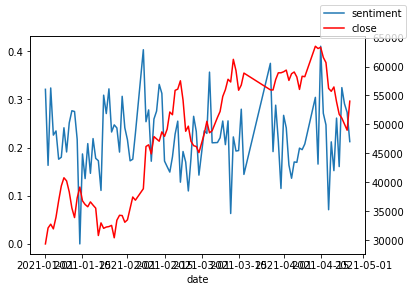

In [141]:
ax = df.plot(x="date", y="sentiment", legend=False)
ax2 = ax.twinx()
df.plot(x="date", y="close", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

# sns.lineplot(x="date", y="sentiment", hue="close", data=merged_price_sent)

In [132]:
df.corr()

,open,high,low,close,adj close,volume,sentiment,change,change_pct
open,1.000000,0.993813,0.982994,0.985714,0.985714,0.262523,-0.278138,-0.339882,-0.355086
high,0.993813,1.000000,0.981376,0.991228,0.991228,0.306026,-0.311167,-0.341366,-0.356259
low,0.982994,0.981376,1.000000,0.992961,0.992961,0.159835,-0.244560,-0.386757,-0.398274
close,0.985714,0.991228,0.992961,1.000000,1.000000,0.226155,-0.291031,-0.379206,-0.393901
adj close,0.985714,0.991228,0.992961,1.000000,1.000000,0.226155,-0.291031,-0.379206,-0.393901
volume,0.262523,0.306026,0.159835,0.226155,0.226155,1.000000,-0.539927,0.075965,0.070769
sentiment,-0.278138,-0.311167,-0.244560,-0.291031,-0.291031,-0.539927,1.000000,0.041536,0.050837
change,-0.339882,-0.341366,-0.386757,-0.379206,-0.379206,0.075965,0.041536,1.000000,0.984335
change_pct,-0.355086,-0.356259,-0.398274,-0.393901,-0.393901,0.070769,0.050837,0.984335,1.000000
